# 1. Decision Trees

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import svm

In [39]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)

In [40]:
print ("Dataset Shape:: ", balance_data.shape)

Dataset Shape::  (625, 5)


In [41]:

balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [42]:
X = balance_data.values[:, 1:5]
y = balance_data.values[:,0]

In [43]:
X

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [44]:
y

array(['B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
       'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

### How does the Decision Tree do the Classification?

![Iris](images/info_gain_final.jpg)

#### __Advantages:__

  1. Decision Trees are easy to explain. It results in a set of rules.
  2. It follows the same approach as humans generally follow while making decisions.
  3. Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.

#### __Disadvantages:__

  1. There is a high probability of _overfitting_ in Decision Tree.
  2. Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
  3. Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
  4. Calculations can become complex when there are many class labels.


### DecisionTreeClassifier()

This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:

- criterion: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
- splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.

  - If an integer is inputted then it considers that value as max features at each split.
  -If float value is taken then it shows the percentage of features at each split.
  - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
  - If “log2” is taken then max_features= log2(n_features).
  - If None, then max_features=n_features. By default, it takes “None” value.
- max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [46]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [47]:
y_pred = clf_gini.predict(X_test)


In [48]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)


Accuracy is  73.40425531914893


In [49]:
scores = []
k_range = range(1,15)
for k in k_range:
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
                                         max_depth=k, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_en)) 

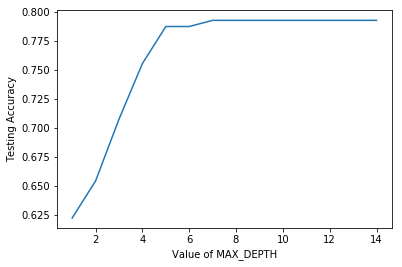

In [50]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of MAX_DEPTH')
plt.ylabel('Testing Accuracy')
plt.show()

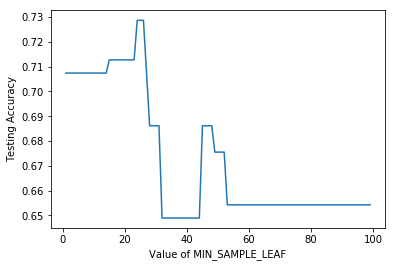

In [51]:
scores = []
k_range = range(1,100)
for k in k_range:
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
                                         max_depth=3, min_samples_leaf=k)
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_en)) 
    
    
plt.plot(k_range, scores)
plt.xlabel('Value of MIN_SAMPLE_LEAF')
plt.ylabel('Testing Accuracy')
plt.show()

## Visualize a Decision Tree

In [52]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

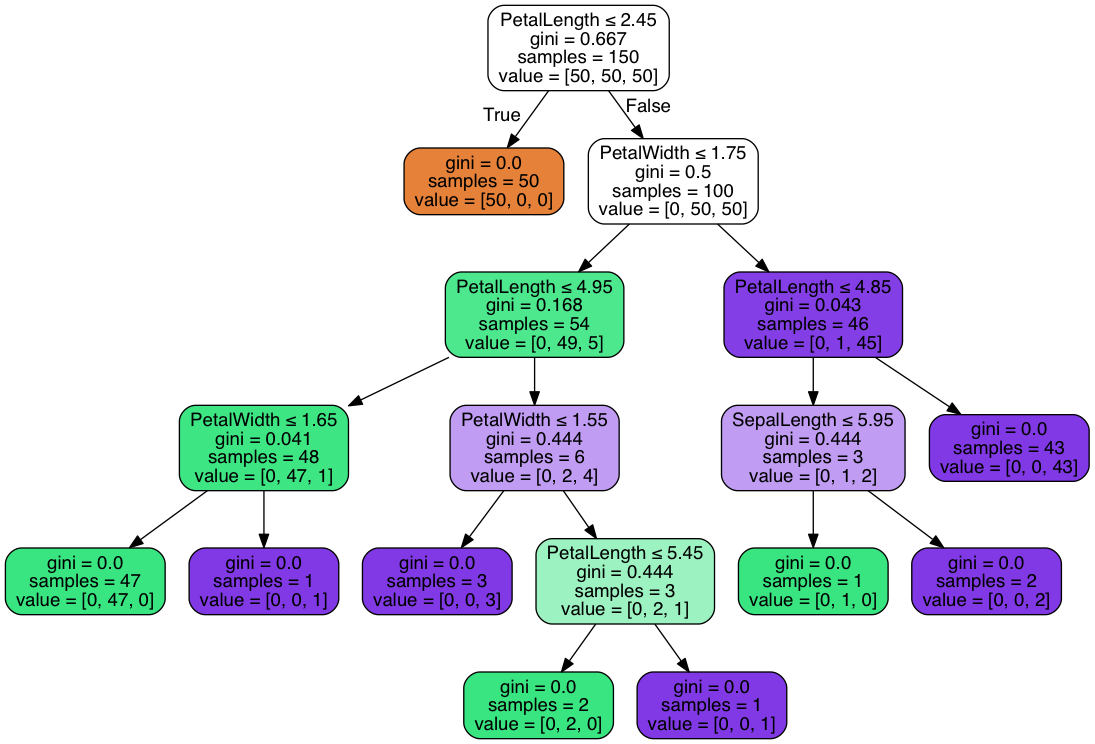

In [53]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [54]:
from visualize_iris import visualize_iris

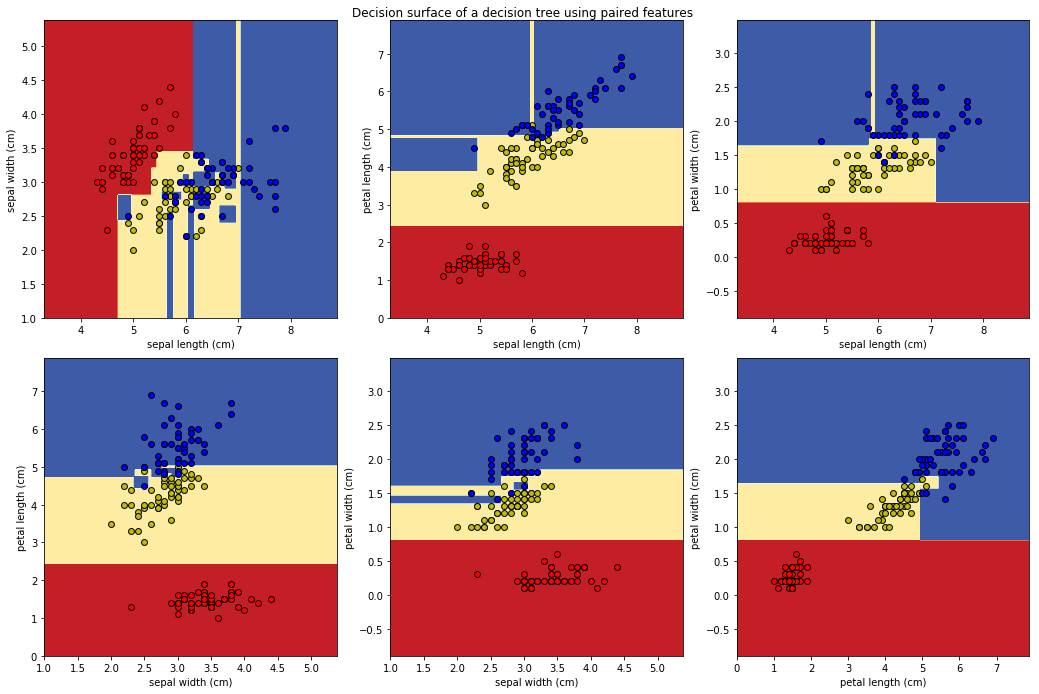

In [55]:
visualize_iris()

# 2. Cross-Validation


What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?


![5-fold cross-validation](images/07_cross_validation_diagram.png)

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [57]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=False)

In [58]:
for fold, i in enumerate(kf.split(X)):
    print ('fold ', fold+1)
    print ('\nTRAIN:\n',i[0], '\nTEST\n' ,i[1])
    print()

fold  1

TRAIN:
 [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
TEST
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

fold  2

TRAIN:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [62]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


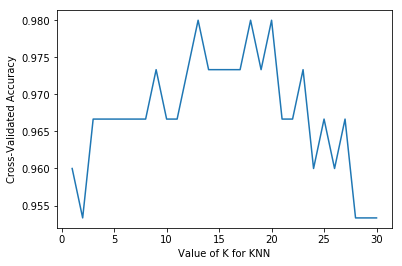

In [63]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Model Selection

In [64]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


# 3. Confusion Matrix

In [66]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

# check classification accuracy of KNN with K=5
clf = svm.LinearSVC(random_state=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [67]:
y_score = clf.decision_function(X_test)

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[18,  0,  0],
       [ 0,  6,  1],
       [ 0,  2, 11]])

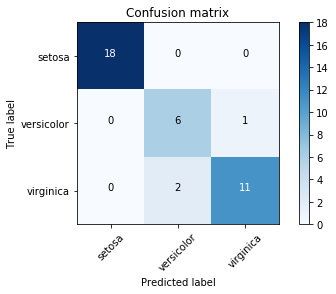

In [70]:
import itertools

# plt.matshow(confusion_matrix(y_pred, y_test),  interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('confusion matrix')
# plt.colorbar()
# plt.ylabel('expected label')
# plt.xlabel('predicted label')
# plt.show()

cm = confusion_matrix(y_pred, y_test)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Hand-written digit recognition

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

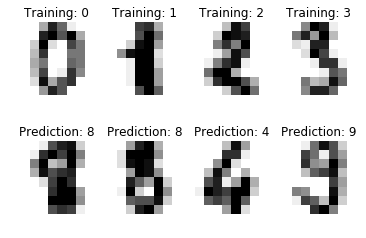

In [5]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()


# 4. PR-Curve

(NEXT TIME)

Precision $(P)$ is defined as the number of true positives $(T_p)$ over the number of true positives plus the number of false positives $(F_p)$.

\begin{equation*}
Precision = \frac{T_p}{T_p+F_p}
\end{equation*}

Recall $(R)$ is defined as the number of true positives $(T_p)$ over the number of true positives plus the number of false negatives $(F_n)$.
\begin{equation*}
Recall = \frac{T_p}{T_p+F_n}
\end{equation*}
These quantities are also related to the $(F_1)$ score, which is defined as the harmonic mean of precision and recall.
\begin{equation*}
F1 = 2\frac{Precision\times Recall}{Precision+Recall}
\end{equation*}
Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve to multi-class or multi-label classification, it is necessary to binarize the output. 

## Create simple data

In [1]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

## Plot the Precision-Recall curve

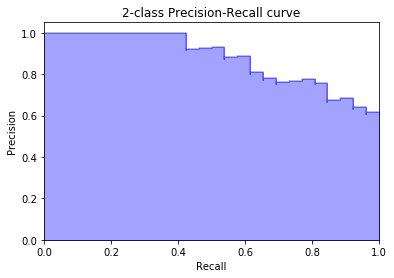

In [4]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()